In [1]:
#Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [103]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Copper_Set.xlsx - Result 1.csv")
df.head(2)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10772\3902332341.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Copper_Set.xlsx - Result 1.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


In [8]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [9]:
df.count()

id               181671
item_date        181672
quantity tons    181673
customer         181672
country          181645
status           181671
item type        181673
application      181649
thickness        181672
width            181673
material_ref     103754
product_ref      181673
delivery date    181672
selling_price    181672
dtype: int64

In [10]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [11]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [12]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in id: ['EC06F063-9DF0-440C-8764-0B0C05A4F6AE'
 '4E5F4B3D-DDDF-499D-AFDE-A3227EC49425'
 'E140FF1B-2407-4C02-A0DD-780A093B1158' ...
 '91643238-5C7B-4237-9A5F-63AE3D35F320'
 '7AFFD323-01D9-4E15-B80D-7D1B03498FC8'
 'AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC']
Unique values in quantity tons: [54.15113862 768.0248392 386.1279489 ... '4.235593568' '-2000'
 '406.6865384']
Unique values in status: ['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable' nan]
Unique values in item type: ['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
Unique values in material_ref: ['DEQ1 S460MC' '0000000000000000000000000000000000104991' 'S0380700' ...
 'MAS65550' '4.11043_1060X5_BRE' '202006170005.IO.1.1']


In [14]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [16]:
# Convert '00000' values to NaN in 'material_ref' column
df['material_ref'] = df['material_ref'].replace('00000', np.nan)

In [17]:
# Convert reference columns to categorical data type
reference_columns = ['material_ref', 'product_ref']
for col in reference_columns:
    df[col] = df[col].astype('category')

In [18]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [19]:
df.describe()

,item_date,customer,country,application,thickness,width,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,3.031010e+07,1.000010e+08


In [21]:
# Drop index column if present
if 'index' in df.columns:
    df = df.drop(columns=['index'])

In [22]:
df.count()

id               181671
item_date        181672
quantity tons    181673
customer         181672
country          181645
status           181671
item type        181673
application      181649
thickness        181672
width            181673
material_ref     103754
product_ref      181673
delivery date    181672
selling_price    181672
dtype: int64

In [23]:
# Check for missing values
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [24]:
# Handle missing values
# For numerical columns, fill missing values with median
numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True) 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10772\2589533559.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10772\2589533559.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [25]:
# Check for missing values
df.isnull().sum()

id                   2
item_date            0
quantity tons        0
customer             0
country              0
status               2
item type            0
application          0
thickness            0
width                0
material_ref     77919
product_ref          0
delivery date        0
selling_price        0
dtype: int64

In [26]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10772\794031214.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [27]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [28]:
# Check for missing values
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [30]:
#Identify and Remove Outliers using Isolation Forest
from sklearn.ensemble import IsolationForest

def remove_outliers_isolation_forest(df, columns):
    iso_forest = IsolationForest(contamination=0.01)  # Adjust contamination as needed
    for col in columns:
        if df[col].dtype != 'object':
            df[col] = df[col].fillna(df[col].median())
            df['outlier'] = iso_forest.fit_predict(df[[col]])
            df = df[df['outlier'] == 1]
            df = df.drop(columns=['outlier'])
    return df

# Numerical columns to check for outliers
numerical_columns = df.select_dtypes(include=[np.number]).columns
df = remove_outliers_isolation_forest(df, numerical_columns)


In [31]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
52,175B56C3-CDF1-4BD4-BC83-C1BF1FEAD8B8,19950000.0,27.743221,30162161.0,77.0,Won,S,4.0,1.10,1300.0,DX51D+Z100 MA,164141591,20210601.0,1046.00
660,C935F95A-F469-4533-BBB7-0DB1356581B6,20210331.0,85.267868,30199280.0,26.0,Won,W,42.0,0.90,1378.0,0000000000000000000000000000000004019006,611993,20210701.0,1054.00
661,E55B1D55-C6B4-4EB3-BE87-79D9BEFCF743,20210331.0,47.568491,30267349.0,84.0,Won,W,10.0,0.70,1500.0,DX51D+Z,1668701718,20210401.0,1183.31
662,B73F459A-4A41-4483-B942-EBA86A33CDF5,20210331.0,27.591592,30329989.0,32.0,Won,Others,42.0,0.88,1045.0,188100079CMUS3ATL,164141591,20210701.0,1060.00
663,D8BF7099-7B4A-4BB2-8B7C-5DC07F8111B4,20210331.0,100.71311,30166502.0,27.0,Won,W,59.0,0.80,1058.0,S350GDHDRAL1028 0.8X1058,611993,20210701.0,1382.40


In [32]:
df.describe()

,item_date,customer,country,application,thickness,width,delivery date,selling_price
count,1.718780e+05,1.718780e+05,171878.000000,171878.000000,171878.000000,171878.000000,1.718780e+05,171878.000000
mean,2.020455e+07,3.023037e+07,44.420688,24.786378,2.483442,1302.903352,2.020731e+07,815.473312
std,4.544585e+03,1.006013e+05,23.946122,16.898368,2.582899,246.236176,4.416797e+03,210.385850
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,635.000000,2.020050e+07,12.000000
25%,2.020093e+07,3.019687e+07,26.000000,10.000000,0.700000,1183.000000,2.020110e+07,669.000000
50%,2.020113e+07,3.020519e+07,30.000000,15.000000,1.500000,1250.000000,2.021010e+07,811.000000
75%,2.021020e+07,3.027249e+07,78.000000,41.000000,3.000000,1500.000000,2.021040e+07,948.000000
max,2.021033e+07,3.040334e+07,89.000000,68.000000,15.100000,2140.000000,2.021080e+07,1529.000000


In [33]:
# Check skewness of numerical columns
skewness = df[numerical_columns].skew()
skewness

item_date         -0.570740
customer        -157.372721
country            0.747550
application        0.625300
thickness          2.156572
width              0.854865
delivery date     -0.735103
selling_price     -0.170317
dtype: float64

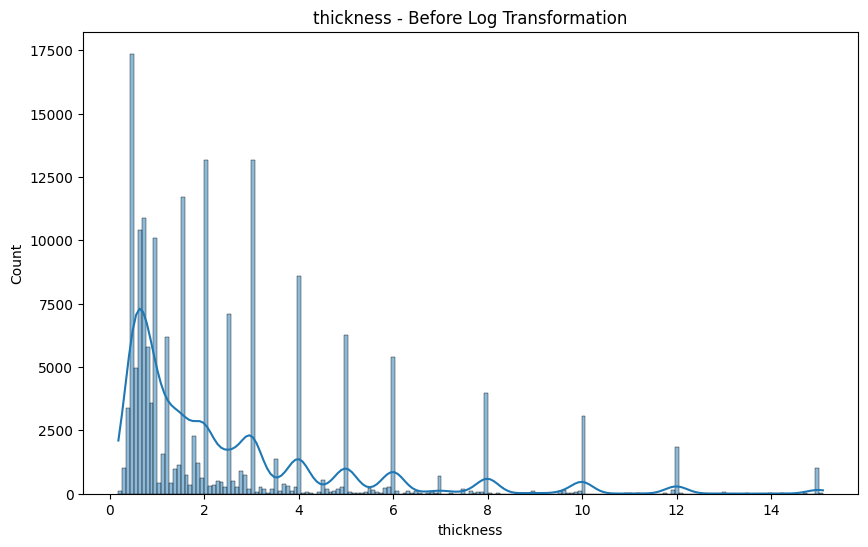

In [34]:
# Plot distributions after transformation
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} - {title}')
    plt.show()

# Plot distribution of 'thickness' before and after transformation
plot_distribution(df, 'thickness', 'Before Log Transformation')

In [35]:
# Apply log transformation to the 'thickness' column
df['thickness'] = np.log1p(df['thickness'])

In [36]:
skewness_after = df[['thickness']].skew()
skewness_after

thickness    0.78146
dtype: float64

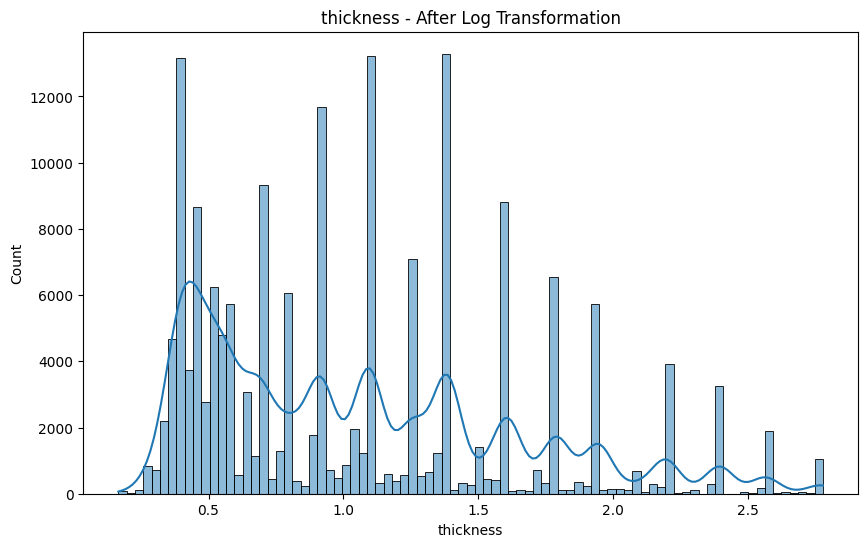

In [37]:
# Plot distributions after transformation
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} - {title}')
    plt.show()

# Plot distribution of 'thickness' before and after transformation
plot_distribution(df, 'thickness', 'After Log Transformation')

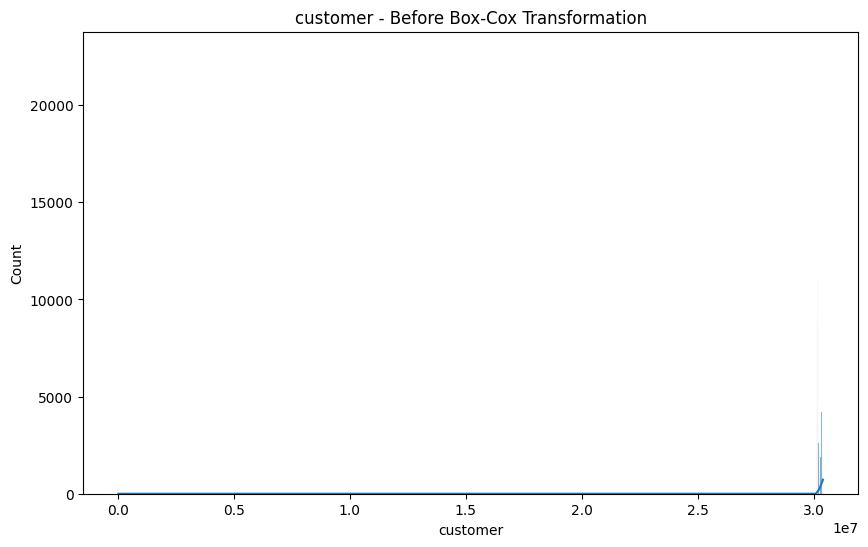

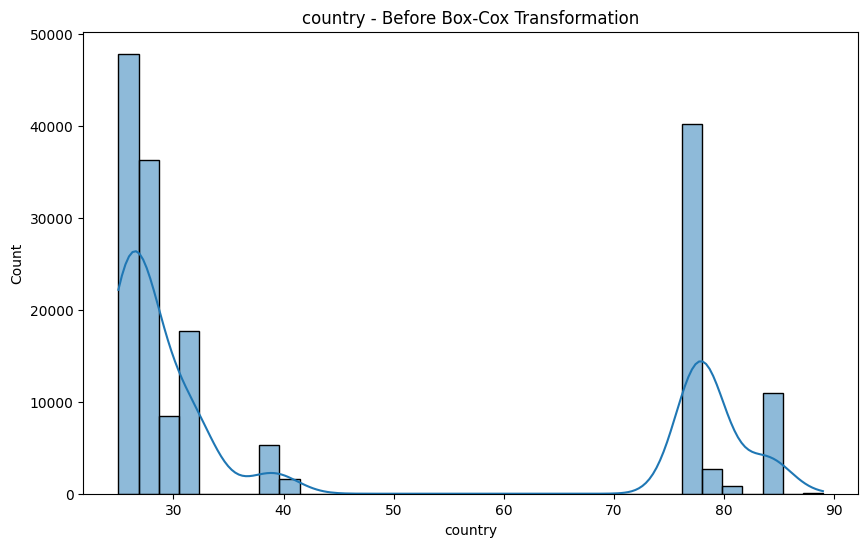

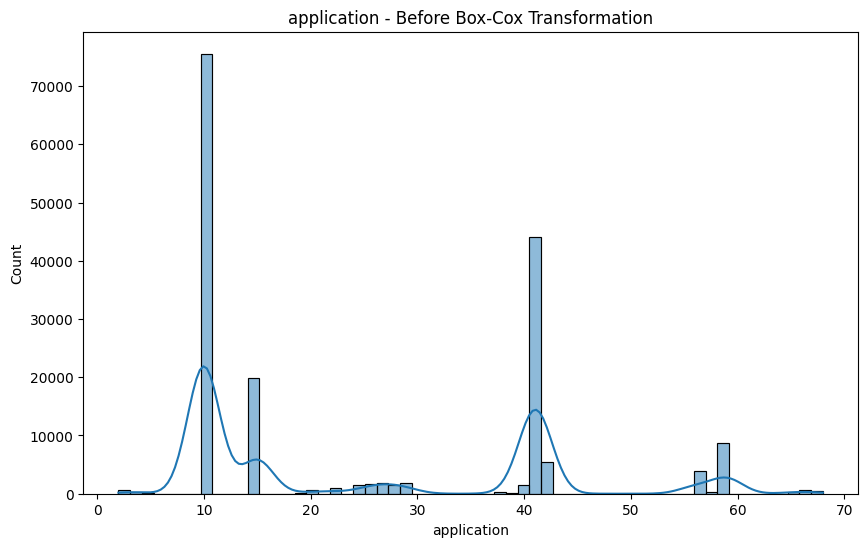

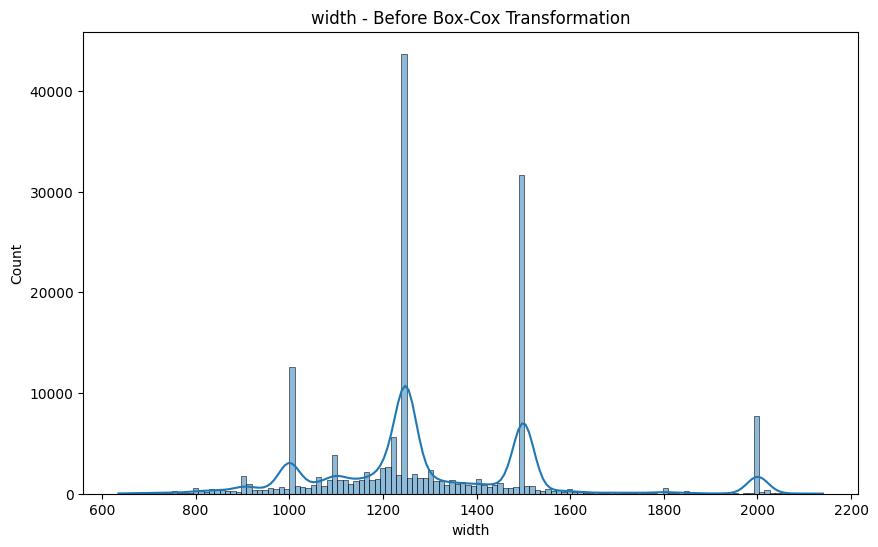

In [38]:
# Plot distributions before transformation
skewed_columns = ['customer', 'country', 'application', 'width']
for col in skewed_columns:
    plot_distribution(df, col, 'Before Box-Cox Transformation')

In [39]:
from scipy.stats import boxcox

def apply_boxcox(df, columns):
    for col in columns:
        if np.any(df[col] <= 0):
            df[col] = np.log1p(df[col])  # Apply log transformation if any value <= 0
        else:
            df[col], _ = boxcox(df[col])
    return df

# Apply Box-Cox transformation to selected columns
skewed_columns = ['customer', 'country', 'application', 'width']
df = apply_boxcox(df, skewed_columns)

In [40]:
# Check skewness after transformation
skewness_after = df[skewed_columns].skew()
skewness_after

customer       0.447218
country        0.482470
application    0.081041
width         -0.007652
dtype: float64

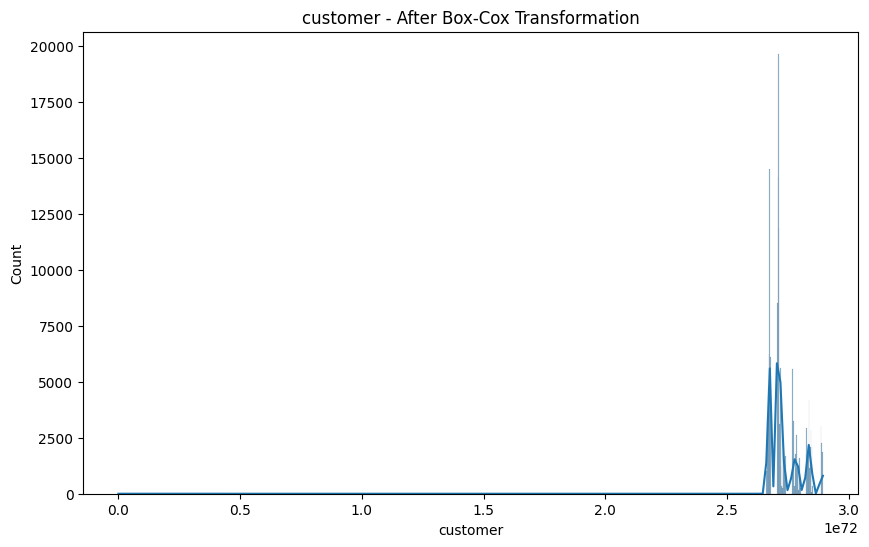

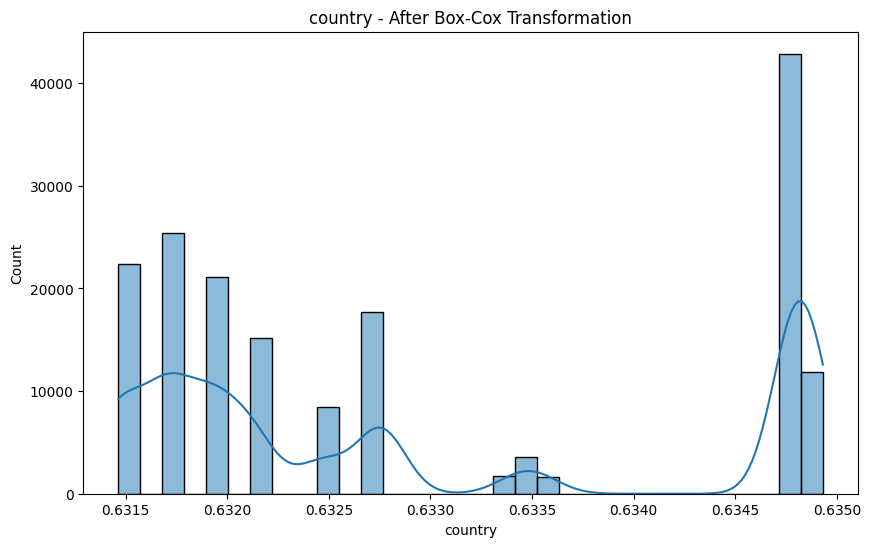

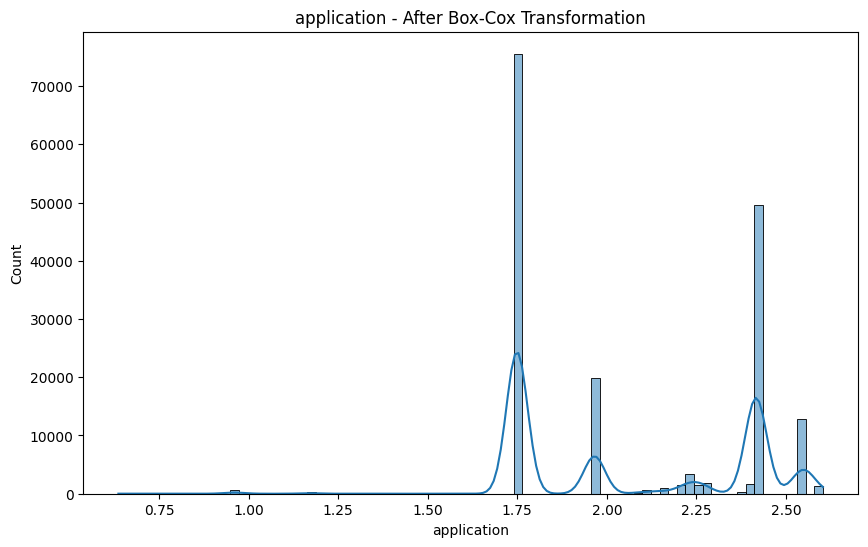

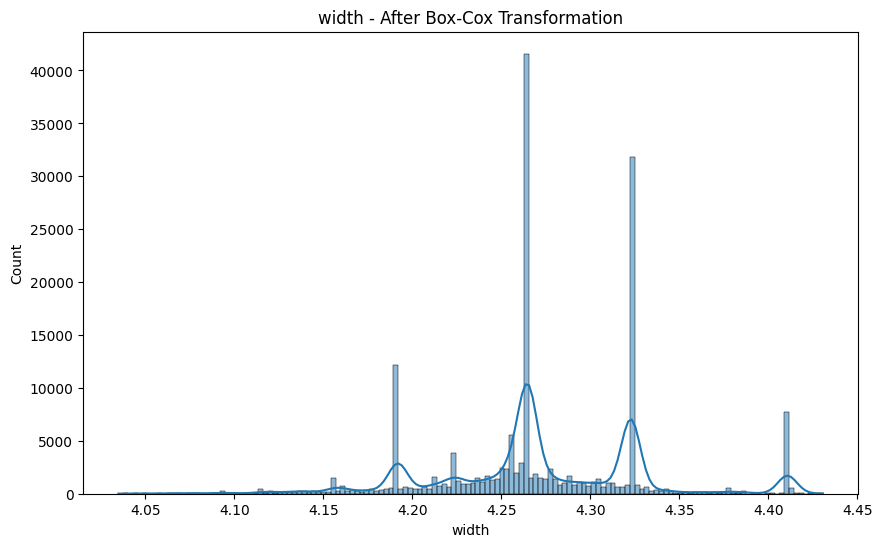

In [41]:
# Plot distributions after transformation
for col in skewed_columns:
    plot_distribution(df, col, 'After Box-Cox Transformation')

In [42]:
# Check skewness of numerical columns
skewness = df[numerical_columns].skew()
skewness

item_date       -0.570740
customer         0.447218
country          0.482470
application      0.081041
thickness        0.781460
width           -0.007652
delivery date   -0.735103
selling_price   -0.170317
dtype: float64

In [43]:
# Convert dates to datetime
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])

# Create new feature: days_to_delivery
df['days_to_delivery'] = (df['delivery date'] - df['item_date']).dt.days

# Drop original date columns
df.drop(['item_date', 'delivery date'], axis=1, inplace=True)

In [45]:
df.head()

,id,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,days_to_delivery
52,175B56C3-CDF1-4BD4-BC83-C1BF1FEAD8B8,27.743221,2.675528e+72,0.634793,Won,S,1.170938,0.741937,4.277564,DX51D+Z100 MA,164141591,1046.00,0
660,C935F95A-F469-4533-BBB7-0DB1356581B6,85.267868,2.708025e+72,0.631705,Won,W,2.425554,0.641854,4.296108,0000000000000000000000000000000004019006,611993,1054.00,0
661,E55B1D55-C6B4-4EB3-BE87-79D9BEFCF743,47.568491,2.768540e+72,0.634880,Won,W,1.749122,0.530628,4.322801,DX51D+Z,1668701718,1183.31,0
662,B73F459A-4A41-4483-B942-EBA86A33CDF5,27.591592,2.825299e+72,0.632756,Won,Others,2.425554,0.631272,4.206526,188100079CMUS3ATL,164141591,1060.00,0
663,D8BF7099-7B4A-4BB2-8B7C-5DC07F8111B4,100.71311,2.679310e+72,0.631922,Won,W,2.553131,0.587787,4.210614,S350GDHDRAL1028 0.8X1058,611993,1382.40,0


In [46]:
df['status'].unique()

array(['Won', 'Revised', 'Draft', 'Lost', 'Not lost for AM',
       'To be approved', 'Offered', 'Offerable'], dtype=object)

In [47]:
df['item type'].unique()

array(['S', 'W', 'Others', 'PL', 'WI', 'IPL', 'SLAWR'], dtype=object)

In [48]:
from sklearn.preprocessing import LabelEncoder

# Handle categorical columns using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['status', 'item type']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Drop columns that are not needed for correlation analysis
df.drop(['id', 'quantity tons', 'material_ref', 'product_ref'], axis=1, inplace=True)

In [49]:
df.head()

,customer,country,status,item type,application,thickness,width,selling_price,days_to_delivery
52,2.675528e+72,0.634793,7,3,1.170938,0.741937,4.277564,1046.00,0
660,2.708025e+72,0.631705,7,5,2.425554,0.641854,4.296108,1054.00,0
661,2.768540e+72,0.634880,7,5,1.749122,0.530628,4.322801,1183.31,0
662,2.825299e+72,0.632756,7,1,2.425554,0.631272,4.206526,1060.00,0
663,2.679310e+72,0.631922,7,5,2.553131,0.587787,4.210614,1382.40,0


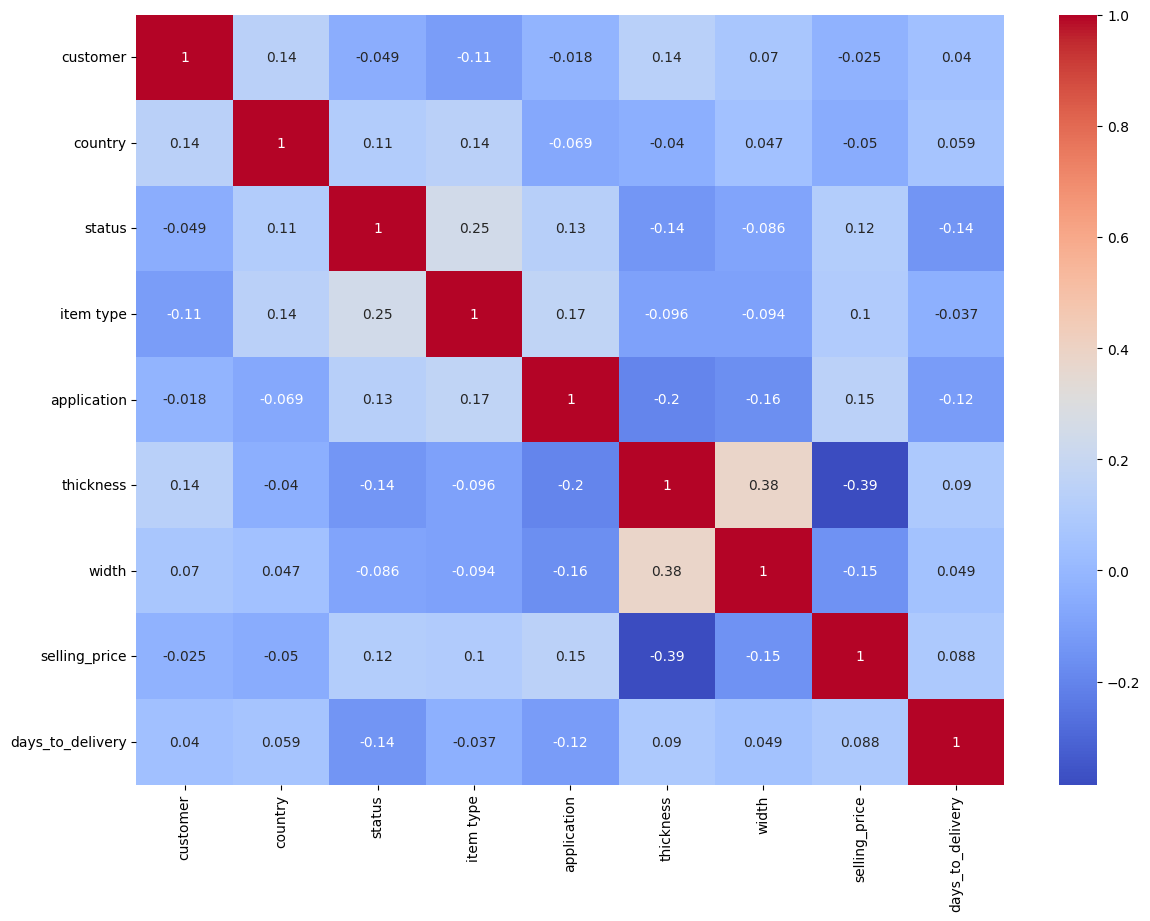

In [50]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [51]:
# Check for and replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Convert all columns to float
df = df.astype(float)


In [52]:
df.head()

,customer,country,status,item type,application,thickness,width,selling_price,days_to_delivery
52,2.675528e+72,0.634793,7.0,3.0,1.170938,0.741937,4.277564,1046.00,0.0
660,2.708025e+72,0.631705,7.0,5.0,2.425554,0.641854,4.296108,1054.00,0.0
661,2.768540e+72,0.634880,7.0,5.0,1.749122,0.530628,4.322801,1183.31,0.0
662,2.825299e+72,0.632756,7.0,1.0,2.425554,0.631272,4.206526,1060.00,0.0
663,2.679310e+72,0.631922,7.0,5.0,2.553131,0.587787,4.210614,1382.40,0.0


In [53]:
# Define a threshold for extremely large values
threshold = 1e+10

# Clip values larger than the threshold
df[df.select_dtypes(include=[np.number]) > threshold] = threshold


In [54]:
df.head()

,customer,country,status,item type,application,thickness,width,selling_price,days_to_delivery
52,1.000000e+10,0.634793,7.0,3.0,1.170938,0.741937,4.277564,1046.00,0.0
660,1.000000e+10,0.631705,7.0,5.0,2.425554,0.641854,4.296108,1054.00,0.0
661,1.000000e+10,0.634880,7.0,5.0,1.749122,0.530628,4.322801,1183.31,0.0
662,1.000000e+10,0.632756,7.0,1.0,2.425554,0.631272,4.206526,1060.00,0.0
663,1.000000e+10,0.631922,7.0,5.0,2.553131,0.587787,4.210614,1382.40,0.0


In [55]:
df['status'].unique()

array([7., 5., 0., 1., 2., 6., 4., 3.])

In [56]:
df['item type'].unique()

array([3., 5., 1., 2., 6., 0., 4.])

In [57]:
# Separate features and target variable for regression
X_reg = df.drop('selling_price', axis=1)
y_reg = df['selling_price']

In [59]:
#packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [60]:
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

# Split into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Initialize the model
rf_regressor = RandomForestRegressor(random_state=42)

In [61]:
# Define hyperparameters for Randomized Search
param_distributions_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}


In [62]:
# Perform Randomized Search
random_search_rf = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_distributions_rf, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search_rf.fit(X_train_reg, y_train_reg)


c:\Users\ADMIN\Desktop\Copper modelling capstone\.venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='neg_mean_squared_error')

In [63]:
# Best model from Randomized Search
best_rf_regressor = random_search_rf.best_estimator_

# Predict and evaluate
y_pred_reg_rf = best_rf_regressor.predict(X_test_reg)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_rf))
r2_rf = r2_score(y_test_reg, y_pred_reg_rf)

In [64]:
X_test_reg

array([[ 0.        , -0.91269068,  0.69931178, ...,  0.45880728,
        -3.02887274,  0.30749826],
       [ 0.        , -0.91269068, -1.58688301, ..., -0.89329627,
         0.62688755,  0.30749826],
       [ 0.        , -1.08928276, -1.20585055, ...,  0.95048012,
        -0.11787544,  0.30749826],
       ...,
       [ 0.        , -0.13952487,  0.69931178, ..., -0.79560774,
         0.86248698,  0.30749826],
       [ 0.        , -0.60735856, -1.58688301, ..., -0.89329627,
         0.86248698, -3.25205091],
       [ 0.        ,  1.35871464,  0.69931178, ...,  0.56910904,
         2.35271686,  0.30749826]])

In [65]:
# Example input data - Adjust based on your model requirements
input_data = {
    'customer': ['30156308'],
    'country': ['28'],
    'status': ['Won'],
    'item type': ['W'],
    'application': ['10'],
    'thickness': [2],        # Numeric
    'width': [1500],          # Numeric
    'days_to_delivery': [20210701] # Numeric
}

# Convert to DataFrame
input_data_df = pd.DataFrame(input_data)

# Handle categorical columns using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['status', 'item type']

# Fit and transform the categorical columns
for col in categorical_columns:
    input_data_df[col] = label_encoder.fit_transform(input_data_df[col])

# Convert all columns to float (if necessary)
input_data_df = input_data_df.astype(float)

# Define a threshold for extremely large values
threshold = 1e+10

# Clip values larger than the threshold
input_data_df[input_data_df.select_dtypes(include=[np.number]) > threshold] = threshold

# Make prediction using the preprocessed input data
predictions = best_rf_regressor.predict(input_data_df)

print("Predictions:", predictions)

Predictions: [781.89935873]


c:\Users\ADMIN\Desktop\Copper modelling capstone\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [66]:
import pickle

# Save the trained model to a .pkl file
with open('rf_regressor_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_regressor, model_file)

In [67]:
print(f"RandomForestRegressor RMSE: {rmse_rf}")
print(f"RandomForestRegressor R^2: {r2_rf}")

RandomForestRegressor RMSE: 132.64487653144437
RandomForestRegressor R^2: 0.6025429106421831


In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [69]:
# Initialize the model
gb_regressor = GradientBoostingRegressor(random_state=42)

# Define hyperparameters for Randomized Search
param_distributions_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}

In [70]:
# Perform Randomized Search
random_search_gb = RandomizedSearchCV(estimator=gb_regressor, param_distributions=param_distributions_gb, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search_gb.fit(X_train_reg, y_train_reg)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='neg_mean_squared_error')

In [71]:
# Best model from Randomized Search
best_gb_regressor = random_search_gb.best_estimator_

# Predict and evaluate
y_pred_reg_gb = best_gb_regressor.predict(X_test_reg)
rmse_gb = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_gb))
r2_gb = r2_score(y_test_reg, y_pred_reg_gb)

In [72]:
print(f"GradientBoostingRegressor RMSE: {rmse_gb}")
print(f"GradientBoostingRegressor R^2: {r2_gb}")

GradientBoostingRegressor RMSE: 137.90786747314732
GradientBoostingRegressor R^2: 0.5703771479382509


In [73]:
# Example input data - Adjust based on your model requirements
input_data = {
    'customer': ['30156308'],
    'country': ['28'],
    'status': ['Won'],
    'item type': ['W'],
    'application': ['10'],
    'thickness': [2],        # Numeric
    'width': [1500],          # Numeric
    'days_to_delivery': [20210701] # Numeric
}

# Convert to DataFrame
input_data_df = pd.DataFrame(input_data)

# Handle categorical columns using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['status', 'item type']

# Fit and transform the categorical columns
for col in categorical_columns:
    input_data_df[col] = label_encoder.fit_transform(input_data_df[col])

# Convert all columns to float (if necessary)
input_data_df = input_data_df.astype(float)

# Define a threshold for extremely large values
threshold = 1e+10

# Clip values larger than the threshold
input_data_df[input_data_df.select_dtypes(include=[np.number]) > threshold] = threshold

# Make prediction using the preprocessed input data
predictions = best_gb_regressor.predict(input_data_df)

print("Predictions:", predictions)

Predictions: [786.9820164]


c:\Users\ADMIN\Desktop\Copper modelling capstone\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [74]:
import pickle

# Save the trained model to a .pkl file
with open('gb_regressor_model.pkl', 'wb') as model_file:
    pickle.dump(best_gb_regressor, model_file)

In [75]:
df.head()

,customer,country,status,item type,application,thickness,width,selling_price,days_to_delivery
52,1.000000e+10,0.634793,7.0,3.0,1.170938,0.741937,4.277564,1046.00,0.0
660,1.000000e+10,0.631705,7.0,5.0,2.425554,0.641854,4.296108,1054.00,0.0
661,1.000000e+10,0.634880,7.0,5.0,1.749122,0.530628,4.322801,1183.31,0.0
662,1.000000e+10,0.632756,7.0,1.0,2.425554,0.631272,4.206526,1060.00,0.0
663,1.000000e+10,0.631922,7.0,5.0,2.553131,0.587787,4.210614,1382.40,0.0


In [76]:
from sklearn.model_selection import train_test_split

# Assume `df` is your DataFrame and 'status' is the target variable
X = df.drop('status', axis=1)
y = df['status']

# Split dataset into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
df.head()

,customer,country,status,item type,application,thickness,width,selling_price,days_to_delivery
52,1.000000e+10,0.634793,7.0,3.0,1.170938,0.741937,4.277564,1046.00,0.0
660,1.000000e+10,0.631705,7.0,5.0,2.425554,0.641854,4.296108,1054.00,0.0
661,1.000000e+10,0.634880,7.0,5.0,1.749122,0.530628,4.322801,1183.31,0.0
662,1.000000e+10,0.632756,7.0,1.0,2.425554,0.631272,4.206526,1060.00,0.0
663,1.000000e+10,0.631922,7.0,5.0,2.553131,0.587787,4.210614,1382.40,0.0


In [78]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and train ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_train_cls, y_train_cls)

# Predict and evaluate
y_pred_cls_et = extra_trees.predict(X_test_cls)

accuracy_et = accuracy_score(y_test_cls, y_pred_cls_et)
precision_et = precision_score(y_test_cls, y_pred_cls_et, average='weighted', zero_division=0)
recall_et = recall_score(y_test_cls, y_pred_cls_et, average='weighted', zero_division=0)
f1_et = f1_score(y_test_cls, y_pred_cls_et, average='weighted', zero_division=0)

print(f"ExtraTreesClassifier - Accuracy: {accuracy_et}, Precision: {precision_et}, Recall: {recall_et}, F1: {f1_et}")

ExtraTreesClassifier - Accuracy: 0.7350477077030486, Precision: 0.7296657224215244, Recall: 0.7350477077030486, F1: 0.7320227366201976


In [79]:
# Example input data - Adjust based on your model requirements
input_data = {
    'customer': ['30156308'],
    'country': ['28'],
    'item type': ['W'],
    'application': ['10'],
    'thickness': [2],        # Numeric
    'width': [1500],   
    'selling_price': [15000],       # Numeric
    'days_to_delivery': [80]
}

# Convert to DataFrame
input_data_df = pd.DataFrame(input_data)

# Handle categorical columns using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['item type']

# Fit and transform the categorical columns
for col in categorical_columns:
    input_data_df[col] = label_encoder.fit_transform(input_data_df[col])

# Convert all columns to float (if necessary)
input_data_df = input_data_df.astype(float)

# Define a threshold for extremely large values
threshold = 1e+10

# Clip values larger than the threshold
input_data_df[input_data_df.select_dtypes(include=[np.number]) > threshold] = threshold

input_data_df



,customer,country,item type,application,thickness,width,selling_price,days_to_delivery
0,30156308.0,28.0,0.0,10.0,2.0,1500.0,15000.0,80.0


In [80]:
y_pred_cls_et

array([7., 7., 7., ..., 7., 1., 7.])

In [81]:
X_test_cls

,customer,country,item type,application,thickness,width,selling_price,days_to_delivery
156684,1.000000e+10,0.631705,5.0,2.106221,1.321756,4.093311,815.00,0.0
102434,1.000000e+10,0.631705,3.0,1.749122,0.530628,4.308907,1170.00,0.0
13936,1.000000e+10,0.631465,5.0,1.749122,1.609438,4.264985,981.00,0.0
98025,1.000000e+10,0.634880,5.0,1.749122,1.386294,4.284366,815.26,0.0
157959,1.000000e+10,0.631922,3.0,2.553131,2.140066,4.329793,497.00,0.0
...,...,...,...,...,...,...,...,...
76213,1.000000e+10,0.634806,5.0,2.416089,0.405465,4.264985,1011.00,0.0
56353,1.000000e+10,0.631705,3.0,2.150645,0.693147,4.264985,997.00,0.0
108506,1.000000e+10,0.632756,5.0,1.749122,0.587787,4.322801,921.00,0.0
160688,1.000000e+10,0.632120,5.0,1.749122,0.530628,4.322801,743.00,-1.0


In [82]:
from sklearn.metrics import roc_auc_score

# Check if there are exactly two classes
if len(set(y_test_cls)) == 2:
    auc_et = roc_auc_score(y_test_cls, extra_trees.predict_proba(X_test_cls)[:, 1])
else:
    auc_et = None

print(f"ExtraTreesClassifier - AUC: {auc_et}")

ExtraTreesClassifier - AUC: None


In [83]:
from sklearn.metrics import roc_auc_score

# Compute ROC AUC score for multi-class classification
# Use `average='macro'` or `average='weighted'` for multi-class
auc_et = roc_auc_score(y_test_cls, extra_trees.predict_proba(X_test_cls), multi_class='ovr')

print(f"ExtraTreesClassifier - AUC: {auc_et}")

ExtraTreesClassifier - AUC: 0.8347377107241616


In [85]:
from xgboost import XGBClassifier

# Initialize and train XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_cls, y_train_cls)

# Predict and evaluate
y_pred_cls_xgb = xgb_classifier.predict(X_test_cls)

accuracy_xgb = accuracy_score(y_test_cls, y_pred_cls_xgb)
precision_xgb = precision_score(y_test_cls, y_pred_cls_xgb, average='weighted', zero_division=0)
recall_xgb = recall_score(y_test_cls, y_pred_cls_xgb, average='weighted', zero_division=0)
f1_xgb = f1_score(y_test_cls, y_pred_cls_xgb, average='weighted', zero_division=0)


print(f"XGBClassifier - Accuracy: {accuracy_xgb}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1: {f1_xgb}")


XGBClassifier - Accuracy: 0.7432220153595531, Precision: 0.7218833272888625, Recall: 0.7432220153595531, F1: 0.7135897953024577


In [86]:
from sklearn.metrics import roc_auc_score

# Check if there are exactly two classes
if len(set(y_test_cls)) == 2:
    auc_et = roc_auc_score(y_test_cls, xgb_classifier.predict_proba(X_test_cls)[:, 1])
else:
    auc_et = None

print(f"XGBClassifier - AUC: {auc_et}")

XGBClassifier - AUC: None


In [87]:
from sklearn.metrics import roc_auc_score

# Compute ROC AUC score for multi-class classification
# Use `average='macro'` or `average='weighted'` for multi-class
auc_et = roc_auc_score(y_test_cls, xgb_classifier.predict_proba(X_test_cls), multi_class='ovr')

print(f"XGBClassifier - AUC: {auc_et}")

XGBClassifier - AUC: 0.9281903894681869


In [88]:
from sklearn.linear_model import LogisticRegression

# Initialize and train LogisticRegression
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression.fit(X_train_cls, y_train_cls)

# Predict and evaluate
y_pred_cls_log = logistic_regression.predict(X_test_cls)

accuracy_log = accuracy_score(y_test_cls, y_pred_cls_log)
precision_log = precision_score(y_test_cls, y_pred_cls_log, average='weighted', zero_division=0)
recall_log = recall_score(y_test_cls, y_pred_cls_log, average='weighted', zero_division=0)
f1_log = f1_score(y_test_cls, y_pred_cls_log, average='weighted', zero_division=0)

print(f"LogisticRegression - Accuracy: {accuracy_log}, Precision: {precision_log}, Recall: {recall_log}, F1: {f1_log}")


LogisticRegression - Accuracy: 0.6397486618571097, Precision: 0.4092783503479624, Recall: 0.6397486618571097, F1: 0.49919644378234296


In [89]:
from sklearn.metrics import roc_auc_score

# Check if there are exactly two classes
if len(set(y_test_cls)) == 2:
    auc_et = roc_auc_score(y_test_cls, logistic_regression.predict_proba(X_test_cls)[:, 1])
else:
    auc_et = None

print(f"LogisticRegression - AUC: {auc_et}")

LogisticRegression - AUC: None


In [90]:
from sklearn.metrics import roc_auc_score

# Compute ROC AUC score for multi-class classification
# Use `average='macro'` or `average='weighted'` for multi-class
auc_et = roc_auc_score(y_test_cls, logistic_regression.predict_proba(X_test_cls), multi_class='ovr')

print(f"LogisticRegression - AUC: {auc_et}")


LogisticRegression - AUC: 0.4811701101583735


In [91]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize model
extra_trees = ExtraTreesClassifier(random_state=42)

# Define hyperparameters for Randomized Search
param_dist_et = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Randomized Search
random_search_et = RandomizedSearchCV(estimator=extra_trees, param_distributions=param_dist_et, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_et.fit(X_train_cls, y_train_cls)

# Best model from Randomized Search
best_et_classifier = random_search_et.best_estimator_


In [92]:
# Make prediction using the preprocessed input data
predictions = best_et_classifier.predict(input_data_df)

print("Predictions:", predictions)

Predictions: [7.]


In [93]:
import pickle

# Save the trained model to a .pkl file
with open('et_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(best_et_classifier, model_file)

In [94]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize model
xgb_classifier = XGBClassifier(random_state=42)

# Define hyperparameters for Randomized Search
param_dist_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Perform Randomized Search
random_search_xgb = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist_xgb, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_xgb.fit(X_train_cls, y_train_cls)

# Best model from Randomized Search
best_xgb_classifier = random_search_xgb.best_estimator_

In [95]:
 #Make prediction using the preprocessed input data
predictions =best_xgb_classifier.predict(input_data_df)

print("Predictions:", predictions)

Predictions: [1]


In [96]:
import pickle

# Save the trained model to a .pkl file
with open('xgb_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(best_xgb_classifier, model_file)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize model
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)

# Define hyperparameters for Grid Search
param_grid_log = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Perform Grid Search
grid_search_log = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_log, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_log.fit(X_train_cls, y_train_cls)

# Best model from Grid Search
best_log_classifier = grid_search_log.best_estimator_

In [98]:
# Make prediction using the preprocessed input data
predictions = best_log_classifier.predict(input_data_df)

print("Predictions:", predictions)

Predictions: [7.]


In [99]:
import pickle

# Save the trained model to a .pkl file
with open('log_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(best_log_classifier, model_file)

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function to evaluate model performance for multiclass classification
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)  # For AUC-ROC, you'll need to handle multiclass differently
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    
    # For AUC-ROC in multiclass, use the average='macro' or 'weighted'
    if len(set(y_test)) > 2:  # Multiclass
        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # One-vs-Rest
    else:  # Binary
        auc_roc = roc_auc_score(y_test, y_prob[:, 1])  # Binary case
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

# Evaluate models
print("Evaluating ExtraTreesClassifier:")
evaluate_model(best_et_classifier, X_test_cls, y_test_cls)

print("\nEvaluating XGBClassifier:")
evaluate_model(best_xgb_classifier, X_test_cls, y_test_cls)

print("\nEvaluating LogisticRegression:")
evaluate_model(best_log_classifier, X_test_cls, y_test_cls)


Evaluating ExtraTreesClassifier:


c:\Users\ADMIN\Desktop\Copper modelling capstone\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7646
Precision: 0.7459
Recall: 0.7646
F1 Score: 0.7476
AUC-ROC: 0.9364

Evaluating XGBClassifier:
Accuracy: 0.7368
Precision: 0.7149
Recall: 0.7368
F1 Score: 0.7040
AUC-ROC: 0.9232

Evaluating LogisticRegression:
Accuracy: 0.6397
Precision: 0.4093
Recall: 0.6397
F1 Score: 0.4992
AUC-ROC: 0.4819


c:\Users\ADMIN\Desktop\Copper modelling capstone\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [101]:
df.dtypes

customer            float64
country             float64
status              float64
item type           float64
application         float64
thickness           float64
width               float64
selling_price       float64
days_to_delivery    float64
dtype: object